In [13]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [14]:
# Reading the dataset
parkinsons_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

In [15]:
# Exploratory data analysis
parkinsons_data.head()
parkinsons_data.describe()
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<Axes: ylabel='count'>

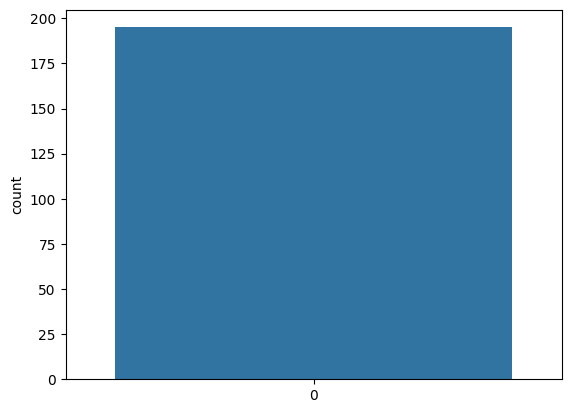

In [16]:
# Checking the class imbalance
parkinsons_data.status.value_counts()
sns.countplot(parkinsons_data.status)

In [17]:
# Splitting the dataset into features and labels
X = parkinsons_data.drop(['name','status'],axis=1)
y = parkinsons_data.status

In [18]:
# Balancing the classes
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [19]:
# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Creating the Random Forest Classifier model
rfc = RandomForestClassifier(random_state=42)

In [22]:
# Setting up the GridSearchCV to optimize hyperparameters
params = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [1, 5, 10, 15, 20]}
grid_search = GridSearchCV(rfc, params, cv=5)

In [23]:
# Training the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [24]:
# Predicting the labels for the testing set
y_pred = grid_search.predict(X_test)

In [25]:
# Evaluating the model performance
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion)

Confusion matrix:
 [[39  0]
 [ 3 47]]


In [26]:
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

Classification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.94      0.97        50

    accuracy                           0.97        89
   macro avg       0.96      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



In [27]:
accuracy = grid_search.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 96.63%


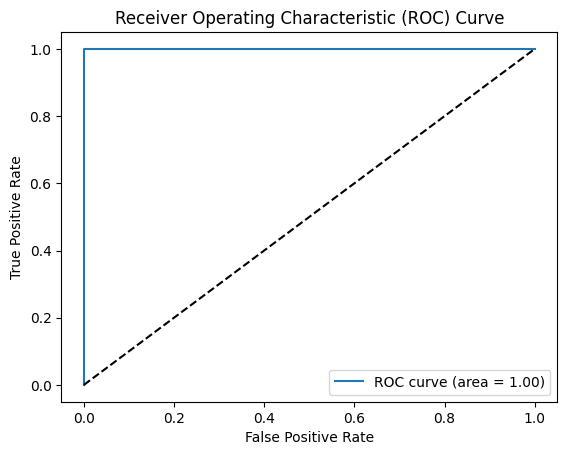

In [28]:
# Plotting the ROC curve
y_prob = grid_search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC curve (area = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix')

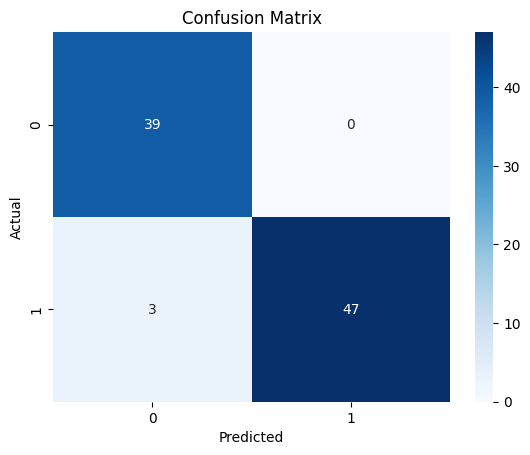

In [29]:
# Plotting the confusion matrix
sns.heatmap(confusion, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')